In [2]:
#%pip install requests
#%pip install matplotlib
#%pip install seaborn
#%pip install pandas
#%pip install scikit-learn
#%pip install numpy
#%pip install numpy scipy
# %pip install json
# %pip install os
import os
import requests
import json

dir = os.getcwd()
print("Current Directory: ", dir)
INPUT_DIR  = dir+"/Data/Images"
OUTPUT_DIR = dir+"/Data/Responses"

print("Input Directory: ", INPUT_DIR)
print("Output Directory: ", OUTPUT_DIR)
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
if not os.path.exists(INPUT_DIR):
    os.makedirs(INPUT_DIR)

Current Directory:  /Users/chetankothari/VS Projects/Threat_Analyzer_Autogen_Multiagent
Input Directory:  /Users/chetankothari/VS Projects/Threat_Analyzer_Autogen_Multiagent/Data/Images
Output Directory:  /Users/chetankothari/VS Projects/Threat_Analyzer_Autogen_Multiagent/Data/Responses


In [3]:

# ← Static parameters
INPUT_DIR  = "/Users/chetankothari/VS Projects/Threat_Analyzer_Autogen_Multiagent/Data/Images"
OUTPUT_DIR = "/Users/chetankothari/VS Projects/Threat_Analyzer_Autogen_Multiagent/Data/Responses"
URL        = "http://127.0.0.1:8000/analyze_image_agent"


In [4]:


os.makedirs(OUTPUT_DIR, exist_ok=True)
exts = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')


In [5]:

for fname in os.listdir(INPUT_DIR):
    if not fname.lower().endswith(exts):
        continue
    
    in_path  = os.path.join(INPUT_DIR, fname)
    out_name = os.path.splitext(fname)[0] + '.json'
    out_path = os.path.join(OUTPUT_DIR, out_name)
    
    with open(in_path, 'rb') as img_file:
        # service expects the image under "file"
        files = {'file': (fname, img_file, 'application/octet-stream')}
        try:
            resp = requests.post(URL, files=files,request_type='threat_analysis')
            resp.raise_for_status()
        except requests.RequestException as e:
            print(f"[ERROR] {fname}: {e}")
            continue
    
    # write JSON (or raw text on parse failure)
    try:
        data = resp.json()
        with open(out_path, 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False, indent=2)
    except ValueError:
        with open(out_path, 'w', encoding='utf-8') as f:
            f.write(resp.text)
    
    print(f"[OK]   {fname} → {out_name}")



TypeError: Session.request() got an unexpected keyword argument 'request_type'

In [6]:
#  After processing, we can check the output files for the threat level and reasoning
%pip install pandas
import os
import json
import pandas as pd

# Initialize a list to store the data for the DataFrame
data = []

# List all image files in the INPUT_DIR
image_files = [f for f in os.listdir(INPUT_DIR) if f.lower().endswith(exts)]
print("Images in directory:", image_files)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Images in directory: ['coba_train (3267).jpg', 'coba_train_bg (47).jpg', 'Non_Threat.jpg', 'coba_train (2677).jpg', 'coba_train (4473).jpg', 'coba_train (418).jpg', 'coba_train (4795).jpg', 'coba_train (3816).jpg', 'coba_train (5995).jpg', 'coba_train (5468).jpg', 'coba_train (3695).jpg', 'coba_train (5413).jpg', 'coba_train (5452).jpg', 'coba_train (2817).jpg', 'coba_train (5405).jpg', 'coba_train (4307).jpg', 'coba_train (4487).jpg', 'coba_train_bg (27).jpg', 'coba_train (3102).jpg', 'coba_train (194).jpg', 'coba_train (340).jpg', 'coba_train (1559).jpg', 'coba_train (3437).jpg', 'coba_train (5275).jpg', 'coba_train (474).jpg', 'coba_train (3543).jpg', 'coba_train (4910).jpg', 'coba_train (5454).jpg', 'coba_train (2831).jpg', 'coba_train (1476).jpg', 'coba_train (3735).jpg', 'coba_train (4434).

In [7]:

# Compare the accuracy against the model threat definition
for image_file in image_files:
    response_file = os.path.join(OUTPUT_DIR, os.path.splitext(image_file)[0] + '.json')
    if os.path.exists(response_file):
        with open(response_file, 'r', encoding='utf-8') as f:
            response_data = json.load(f)
        
        # Extract and handle the threat level
        threat_level = response_data.get('threat_level', 'N/A')
        if isinstance(threat_level, str):
            # Handle cases where threat_level is a string
            numeric_threat_level = threat_level.split("–")[0].strip()  # Extract the numeric part
        elif isinstance(threat_level, dict):
            # Handle cases where threat_level is a dictionary
            numeric_threat_level = threat_level.get('threatLevel', 'N/A')
        else:
            # Handle unexpected cases
            numeric_threat_level = 'N/A'

        # Append the image name and numeric threat level to the data list
        data.append({"Image Name": image_file, "Threat Level": numeric_threat_level})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)
# Drop the file extension from the image names 
df['Image Name'] = df['Image Name'].str.replace('.jpg', '', regex=False)

# Display the DataFrame
print(df)


            Image Name Threat Level
0    coba_train (3267)            1
1   coba_train_bg (47)            1
2           Non_Threat            0
3    coba_train (2677)            0
4    coba_train (4473)            2
..                 ...          ...
79   coba_train (2176)            0
80    coba_train (972)            0
81   coba_train (1776)            0
82   coba_train (5298)            1
83   coba_train (1672)            0

[84 rows x 2 columns]


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# now lets load the model threal level from the Model_threat_labels.csv file
# Check if the CSV file exists
csv_file_path = 'Data/Model_threat_labels.csv'
if not os.path.exists(csv_file_path):
    print(f"CSV file '{csv_file_path}' does not exist.")
else:
    print(f"CSV file '{csv_file_path}' exists.")

model_threat_levels = pd.read_csv(csv_file_path, encoding='utf-8', sep=';')
# Display the first few rows of the model threat levels DataFrame
print(model_threat_levels.head())
# Load rtghe csv file in the data frame
df2 = pd.read_csv(csv_file_path, encoding='utf-8', sep=';')
# Display the first few rows of the DataFrame
print(df2.head())
df2.drop(columns=['Unnamed: 2'], inplace=True)
print(df2)
print(df2.__len__)

CSV file 'Data/Model_threat_labels.csv' exists.
          Image Name  Threat Level Unnamed: 2
0      Midium_Threat             2        NaN
1  coba_train (1146)             0        NaN
2  coba_train (4958)             0        NaN
3  coba_train (4795)             0        NaN
4  coba_train (4487)             3        NaN
          Image Name  Threat Level Unnamed: 2
0      Midium_Threat             2        NaN
1  coba_train (1146)             0        NaN
2  coba_train (4958)             0        NaN
3  coba_train (4795)             0        NaN
4  coba_train (4487)             3        NaN
           Image Name  Threat Level
0       Midium_Threat             2
1   coba_train (1146)             0
2   coba_train (4958)             0
3   coba_train (4795)             0
4   coba_train (4487)             3
..                ...           ...
86   coba_train (821)             0
87   coba_train (474)             0
88   coba_train (418)             0
89   coba_train (340)             0
90  

In [9]:
# Verify column names
#df2 = df.copy() 
print("Original columns:", df2.columns)

# Rename the column
df2.rename(columns={'Threat Level': 'threat_level_model'}, inplace=True)
# Display the first few rows and updated column names
print(df2.head())
print("Updated columns:", df2.columns)

Original columns: Index(['Image Name', 'Threat Level'], dtype='object')
          Image Name  threat_level_model
0      Midium_Threat                   2
1  coba_train (1146)                   0
2  coba_train (4958)                   0
3  coba_train (4795)                   0
4  coba_train (4487)                   3
Updated columns: Index(['Image Name', 'threat_level_model'], dtype='object')


           Image Name Threat Level  threat_level_model
0   coba_train (3267)            1                   1
1  coba_train_bg (47)            1                   0
2          Non_Threat            0                   1
3   coba_train (2677)            0                   0
4   coba_train (4473)            2                   3
Index(['Image Name', 'Threat Level', 'threat_level_model'], dtype='object')
           Image Name  Accuracy
0   coba_train (3267)     Match
1  coba_train_bg (47)  Mismatch
2          Non_Threat  Mismatch
3   coba_train (2677)     Match
4   coba_train (4473)  Mismatch
Accuracy Percentage: 47.78%


/var/folders/61/39zk8n_x5l32mb7rjkls_4n00000gn/T/ipykernel_7799/706115227.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accuracy_df, x='Accuracy', palette='Set2')


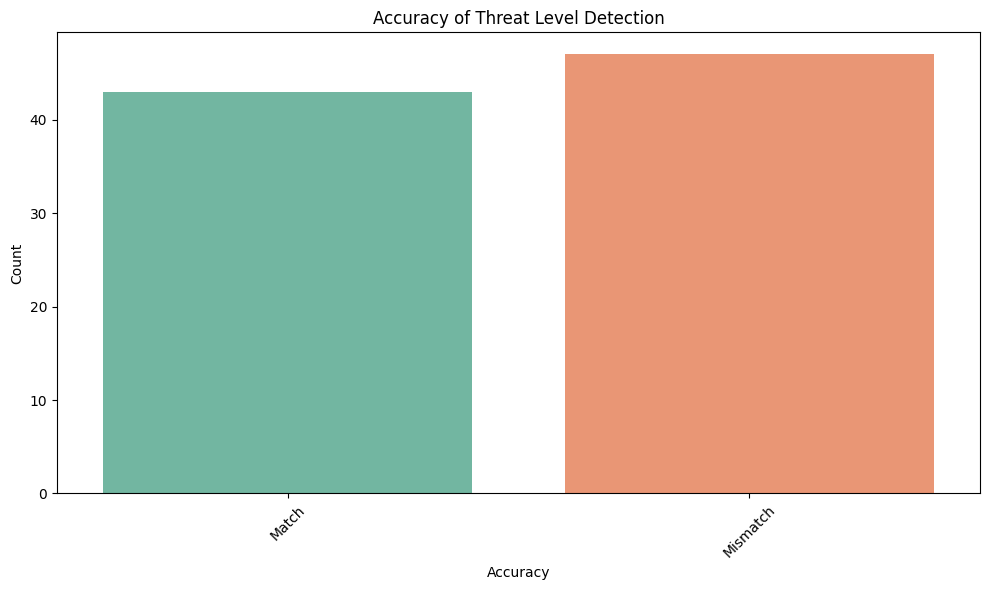

           Image Name  Accuracy
0   coba_train (3267)         1
1  coba_train_bg (47)         0
2          Non_Threat         0
3   coba_train (2677)         1
4   coba_train (4473)         0


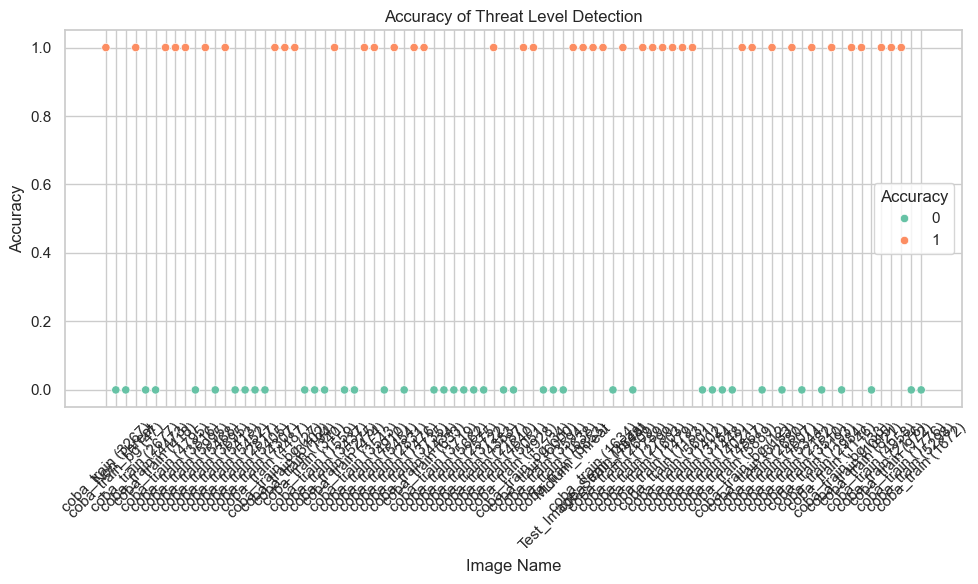

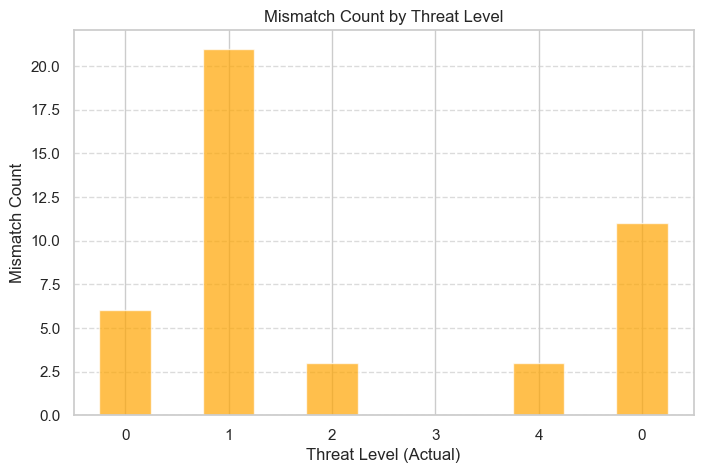

Threat level with the most mismatches: 1


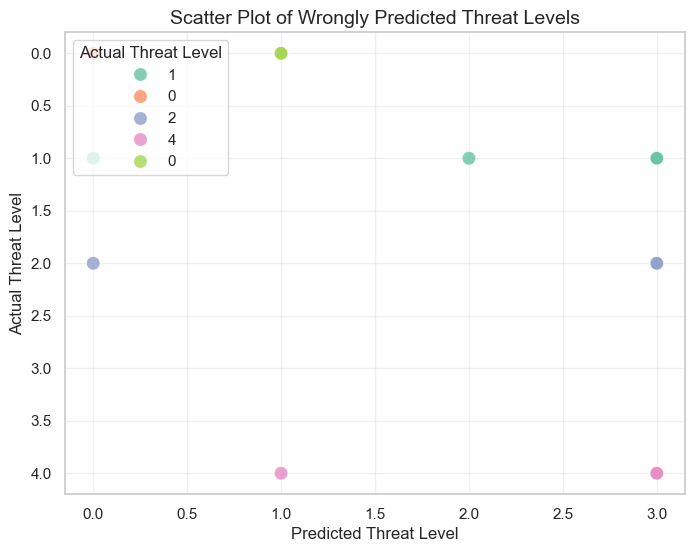

In [10]:
#Now lets megrge two data frames
# Merge the two DataFrames on the 'Image Name' column
merged_df = pd.merge(df, df2, on='Image Name', how='inner')
# Display the merged DataFrame 
print(merged_df.head())
# Display the merged DataFrame
print(merged_df.columns)
# Now lets check the acuracy of the model by comparing the threat levels
# Initialize a list to store the accuracy results
accuracy_results = []
# Compare the threat levels
for index, row in merged_df.iterrows():
    image_name = row['Image Name']
    threat_level = row['Threat Level']
    threat_level_model = row['threat_level_model']
    
    # Check if the threat levels match
    if threat_level == threat_level_model:
        accuracy_results.append({"Image Name": image_name, "Accuracy": "Match"})
    else:
        accuracy_results.append({"Image Name": image_name, "Accuracy": "Mismatch"})
# lets calculate the accuracy percentage
accuracy_df = pd.DataFrame(accuracy_results)
# Display the accuracy DataFrame
print(accuracy_df.head())
# Calculate the accuracy percentage 
accuracy_percentage = (accuracy_df['Accuracy'].value_counts(normalize=True) * 100).get('Match', 0)
# Display the accuracy percentage
print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")
# Lets plot the accuracy results
plt.figure(figsize=(10, 6))
sns.countplot(data=accuracy_df, x='Accuracy', palette='Set2')
plt.title('Accuracy of Threat Level Detection')
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Now lets plot a scatter plot the accuracy results with value threal levels
# Convert the accuracy results to a DataFrame
accuracy_df = pd.DataFrame(accuracy_results)
# Map the accuracy values to numerical values for plotting
accuracy_df['Accuracy'] = accuracy_df['Accuracy'].map({'Match': 1, 'Mismatch': 0})
# Display the accuracy DataFrame
print(accuracy_df.head())
# Plot the accuracy results
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of seaborn
sns.set(style='whitegrid')
# Plot the accuracy results


plt.figure(figsize=(10, 6))
sns.scatterplot(data=accuracy_df, x='Image Name', y='Accuracy', hue='Accuracy', palette='Set2')
plt.title('Accuracy of Threat Level Detection')
plt.xlabel('Image Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add a column to indicate mismatches in df2
merged_df["mismatch"] = merged_df["Threat Level"] != merged_df["threat_level_model"]

# Group by actual threat levels and count mismatches
mismatch_counts = merged_df.groupby("Threat Level")["mismatch"].sum()

# Plot the mismatches
plt.figure(figsize=(8, 5))
mismatch_counts.plot(kind="bar", color="orange", alpha=0.7)
plt.title("Mismatch Count by Threat Level")
plt.xlabel("Threat Level (Actual)")
plt.ylabel("Mismatch Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print the threat level with the most mismatches
most_mismatched_level = mismatch_counts.idxmax()
print(f"Threat level with the most mismatches: {most_mismatched_level}")

# Filter mismatched rows
mismatches = merged_df[merged_df["Threat Level"] != merged_df["threat_level_model"]]

# Scatter plot of mismatches
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=mismatches,
    x="threat_level_model",
    y="Threat Level",
    hue="Threat Level",  # Color points by the actual threat level
    palette="Set2",
    s=100,  # Size of the points
    alpha=0.8
)

# Add labels and title
plt.title("Scatter Plot of Wrongly Predicted Threat Levels", fontsize=14)
plt.xlabel("Predicted Threat Level", fontsize=12)
plt.ylabel("Actual Threat Level", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Actual Threat Level", loc="upper left")
plt.show()



Number of mismatches per correct threat level:
Threat Level
0    10
1    21
2     3
4     3
dtype: int64


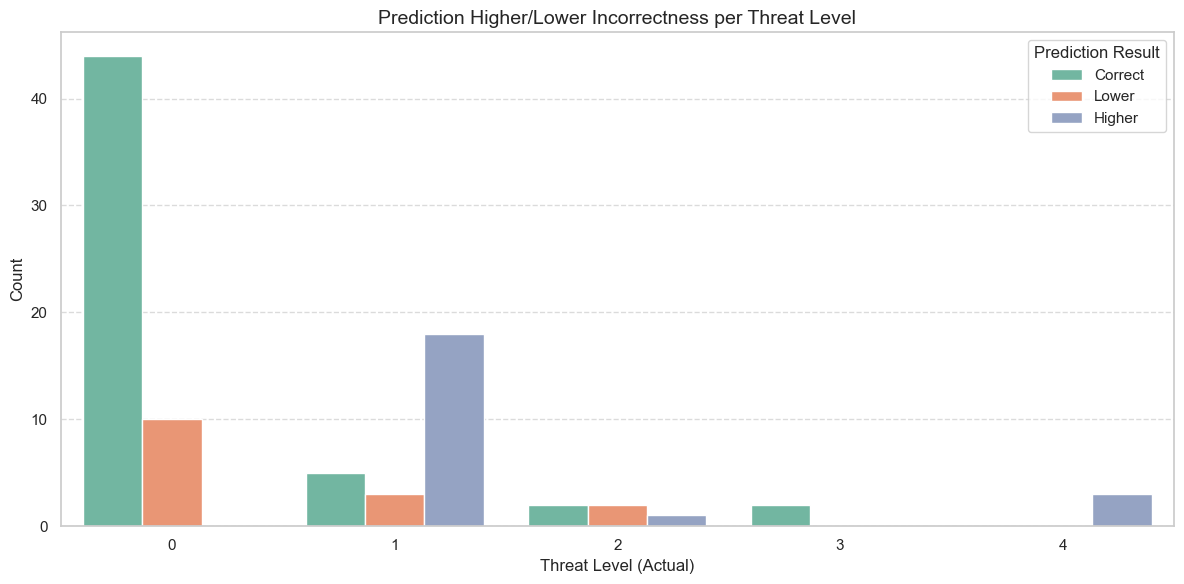

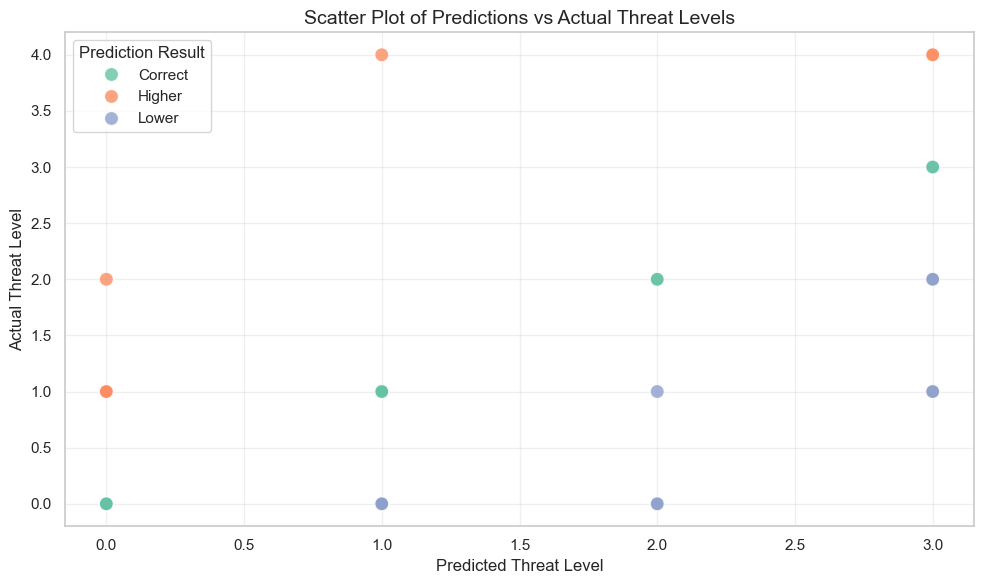

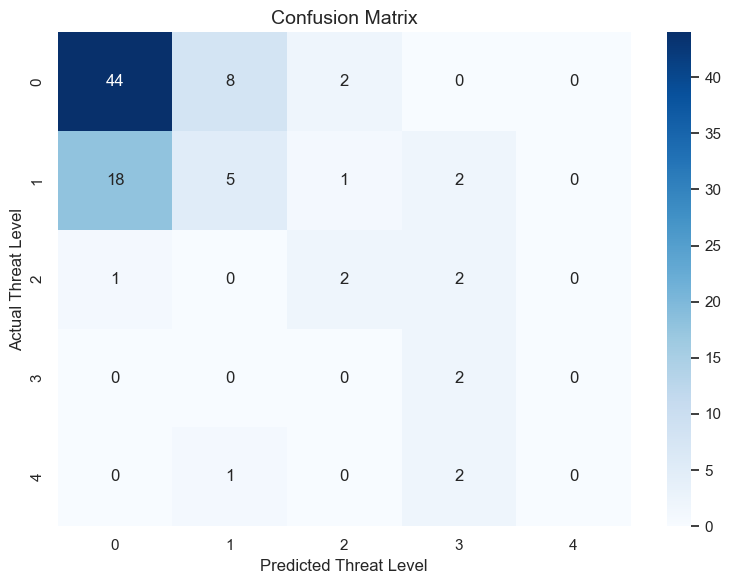

In [11]:

# Import necessary libraries
import os   
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Ensure both columns are numeric
merged_df['Threat Level'] = pd.to_numeric(merged_df['Threat Level'], errors='coerce').fillna(0).astype(int)
merged_df['threat_level_model'] = pd.to_numeric(merged_df['threat_level_model'], errors='coerce').fillna(0).astype(int)

# Add a new column to classify predictions
def classify_prediction(row):
    if row['Threat Level'] > row['threat_level_model']:
        return "Higher"
    elif row['Threat Level'] < row['threat_level_model']:
        return "Lower"
    else:
        return "Correct"

merged_df['Prediction Result'] = merged_df.apply(classify_prediction, axis=1)

# Group by Threat Level and Prediction Result for bar chart
grouped_data = merged_df.groupby(['Threat Level', 'Prediction Result']).size().reset_index(name='Count')

# Calculate mismatches per correct threat level
mismatch_counts = merged_df[merged_df['Prediction Result'] != 'Correct'].groupby('Threat Level').size()

# Display mismatch counts
print("Number of mismatches per correct threat level:")
print(mismatch_counts)

# Plot 1: Bar chart for higher/lower/correct predictions per threat level
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Threat Level', y='Count', hue='Prediction Result', palette='Set2')
plt.title('Prediction Higher/Lower Incorrectness per Threat Level', fontsize=14)
plt.xlabel('Threat Level (Actual)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Prediction Result', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Scatter plot for predictions vs actual threat levels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='threat_level_model',
    y='Threat Level',
    hue='Prediction Result',  # Color points by Prediction Result
    palette='Set2',
    s=100,  # Size of the points
    alpha=0.8
)

# Add labels and title
plt.title('Scatter Plot of Predictions vs Actual Threat Levels', fontsize=14)
plt.xlabel('Predicted Threat Level', fontsize=12)
plt.ylabel('Actual Threat Level', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Prediction Result', loc='upper left')
plt.tight_layout()
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(merged_df['Threat Level'], merged_df['threat_level_model'], labels=np.unique(merged_df['Threat Level']))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(merged_df['Threat Level']), yticklabels=np.unique(merged_df['Threat Level']))
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Threat Level', fontsize=12)
plt.ylabel('Actual Threat Level', fontsize=12)
plt.tight_layout()
plt.show()


           Image Name  Threat Level  threat_level_model  mismatch  \
0   coba_train (3267)             1                   1     False   
1  coba_train_bg (47)             1                   0      True   
2          Non_Threat             0                   1      True   
3   coba_train (2677)             0                   0     False   
4   coba_train (4473)             2                   3      True   

  Prediction Result  Threat_Predicted  Threat_Actual  
0           Correct                 1              1  
1            Higher                 1              0  
2             Lower                 0              1  
3           Correct                 0              0  
4             Lower                 1              1  


/var/folders/61/39zk8n_x5l32mb7rjkls_4n00000gn/T/ipykernel_7799/609491166.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Threat_Predicted', palette='Set2')


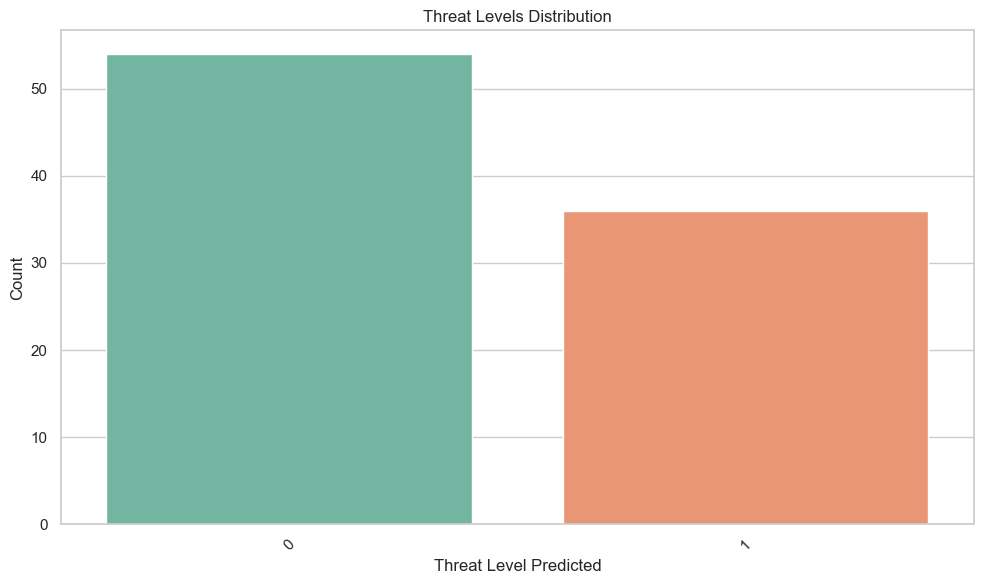

/var/folders/61/39zk8n_x5l32mb7rjkls_4n00000gn/T/ipykernel_7799/609491166.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Threat_Actual', palette='Set2')


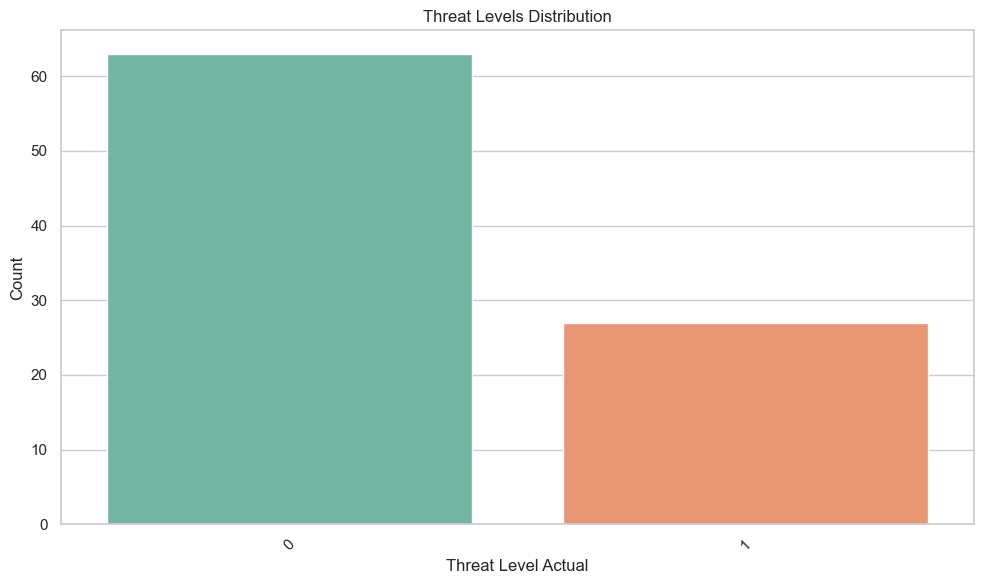

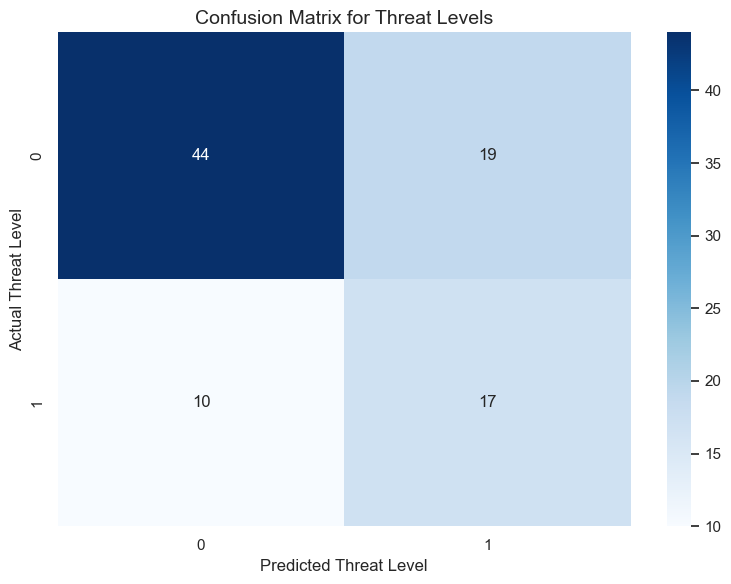

Accuracy of the model: 0.68


In [12]:
#Lets create a new feature in merged df that identifies threat or no threat, if the theat level is greater than 0 in both predicted and actual
# Create a new column 'Threat' based on the condition 
merged_df['Threat_Predicted'] = merged_df['Threat Level'].apply(lambda x: 1 if x > 0 else 0)
merged_df['Threat_Actual'] = merged_df['threat_level_model'].apply(lambda x: 1 if x > 0 else 0)
# Display the first few rows of the updated DataFrame
print(merged_df.head())
#Now lets plot the threat levels
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Threat_Predicted', palette='Set2')
plt.title('Threat Levels Distribution')
plt.xlabel('Threat Level Predicted')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Plot the actual threat levels
plt.figure(figsize=(10, 6))     
sns.countplot(data=merged_df, x='Threat_Actual', palette='Set2')
plt.title('Threat Levels Distribution')
plt.xlabel('Threat Level Actual')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Now lets plot the confusion matrix for the Threat_Predicted and Threat_Actual
# Generate the confusion matrix
cm_threat = confusion_matrix(merged_df['Threat_Actual'], merged_df['Threat_Predicted'], labels=np.unique(merged_df['Threat_Actual']))
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_threat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(merged_df['Threat_Actual']), yticklabels=np.unique(merged_df['Threat_Actual']))
plt.title('Confusion Matrix for Threat Levels', fontsize=14)
plt.xlabel('Predicted Threat Level', fontsize=12)
plt.ylabel('Actual Threat Level', fontsize=12)
plt.tight_layout()
plt.show()
#Lets calculate the accuracy of the model
# Calculate the accuracy
accuracy = (merged_df['Threat_Predicted'] == merged_df['Threat_Actual']).mean()
# Display the accuracy
# Calculate the accuracy percentage
accuracy_percentage = accuracy * 100
print(f"Accuracy of the model: {accuracy_percentage:.2f}")

In [46]:
df2.to_csv('model.csv', index=False)
# Save the merged DataFrame to a CSV file   
print("Model DataFrame saved to 'model.csv'")

Model DataFrame saved to 'model.csv'


In [63]:
%pip install openpyxl
#Lets compare the prediction with earlier non agent based pipeline
non_agent_df = pd.read_excel('threat_analysis.xlsx')
# Display the first few rows of the non-agent DataFrame
print(non_agent_df.head())


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
               Image Name                                        Description  \
0   coba_train (3267).jpg  Description:\n**Scenario Overview**\n\nThe ima...   
1  coba_train_bg (47).jpg  Description:\n**Scenario Assessment**\n\n*   *...   
2          Non_Threat.jpg  Description:\n**Military Scenario Assessment**...   
3   coba_train (2677).jpg  Description:\n**Military Scenario Assessment**...   
4   coba_train (4473).jpg  Description:\n**Scene Type:** Battlefield\n\n*...   

                                             Objects  \
0  Objects Detected:\nThe image presents a collec...   
1  Objects Detected:\nThe image depicts a small, ...   
2  Objects Detected:\nThe image shows a large gre...   
3  Objects Detected:\nThe image depicts a cannon ...   
4  Objects Detected:\nThe image depicts a pers

In [70]:
df_temp = non_agent_df.copy()
# Drop the file extension from the image names
df_temp['Image Name'] = df_temp['Image Name'].str.replace('.jpg', '', regex=False)
#Lets drop the unwanted columns
print(df_temp.columns)
df_temp.drop(columns=['Description', 'Objects', 'Reasoning'], inplace=True)
print(df_temp.head())
# Now lets drop the unwanted text from column threat class
df_temp['Threat Class'] = df_temp['Threat Class'].str.extract(r'(\d+)').astype(int)
print(df_temp.head())
print(df_temp.__len__)

Index(['Image Name', 'Description', 'Objects', 'Reasoning', 'Threat Class'], dtype='object')
           Image Name       Threat Class
0   coba_train (3267)  Threat Level: 0\n
1  coba_train_bg (47)  Threat Level: 0\n
2          Non_Threat  Threat Level: 0\n
3   coba_train (2677)  Threat Level: 0\n
4   coba_train (4473)  Threat Level: 3\n
           Image Name  Threat Class
0   coba_train (3267)             0
1  coba_train_bg (47)             0
2          Non_Threat             0
3   coba_train (2677)             0
4   coba_train (4473)             3
<bound method DataFrame.__len__ of             Image Name  Threat Class
0    coba_train (3267)             0
1   coba_train_bg (47)             0
2           Non_Threat             0
3    coba_train (2677)             0
4    coba_train (4473)             3
..                 ...           ...
79   coba_train (2176)             0
80    coba_train (972)             1
81   coba_train (1776)             0
82   coba_train (5298)             0
83 

In [72]:
#Now lets compare the two data frames 
# Merge the two DataFrames on the 'Image Name' column
merged_df_final = pd.merge(df_temp, df2, on='Image Name', how='inner')
# Display the merged DataFrame  
print(merged_df_final.head())
print(merged_df_final.__len__)

           Image Name  Threat Class  threat_level_model
0   coba_train (3267)             0                   1
1  coba_train_bg (47)             0                   0
2          Non_Threat             0                   1
3   coba_train (2677)             0                   0
4   coba_train (4473)             3                   3
<bound method DataFrame.__len__ of             Image Name  Threat Class  threat_level_model
0    coba_train (3267)             0                   1
1   coba_train_bg (47)             0                   0
2           Non_Threat             0                   1
3    coba_train (2677)             0                   0
4    coba_train (4473)             3                   3
..                 ...           ...                 ...
85   coba_train (2176)             0                   0
86    coba_train (972)             1                   0
87   coba_train (1776)             0                   0
88   coba_train (5298)             0                   3
89

           Image Name  Accuracy
0   coba_train (3267)  Mismatch
1  coba_train_bg (47)     Match
2          Non_Threat  Mismatch
3   coba_train (2677)     Match
4   coba_train (4473)     Match
Accuracy Percentage: 64.44%


/var/folders/61/39zk8n_x5l32mb7rjkls_4n00000gn/T/ipykernel_21392/476760550.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accuracy_df_final, x='Accuracy', palette='Set2')


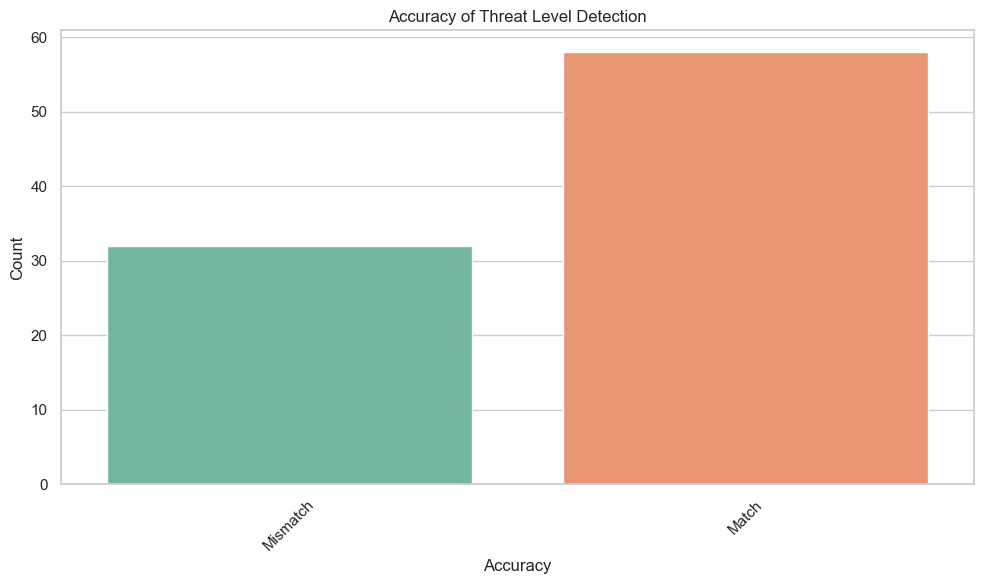

In [73]:
# Now lets check the acuracy of the model by comparing the threat levels
# Initialize a list to store the accuracy results
accuracy_results_final = []
# Compare the threat levels 
for index, row in merged_df_final.iterrows():
    image_name = row['Image Name']
    threat_level = row['Threat Class']
    threat_level_model = row['threat_level_model']
    
    # Check if the threat levels match
    if threat_level == threat_level_model:
        accuracy_results_final.append({"Image Name": image_name, "Accuracy": "Match"})
    else:
        accuracy_results_final.append({"Image Name": image_name, "Accuracy": "Mismatch"})
# lets calculate the accuracy percentage
accuracy_df_final = pd.DataFrame(accuracy_results_final)
# Display the accuracy DataFrame
print(accuracy_df_final.head())
# Calculate the accuracy percentage
accuracy_percentage_final = (accuracy_df_final['Accuracy'].value_counts(normalize=True) * 100).get('Match', 0)
# Display the accuracy percentage
print(f"Accuracy Percentage: {accuracy_percentage_final:.2f}%")
# Lets plot the accuracy results
plt.figure(figsize=(10, 6))
sns.countplot(data=accuracy_df_final, x='Accuracy', palette='Set2')
plt.title('Accuracy of Threat Level Detection')
plt.xlabel('Accuracy')  
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

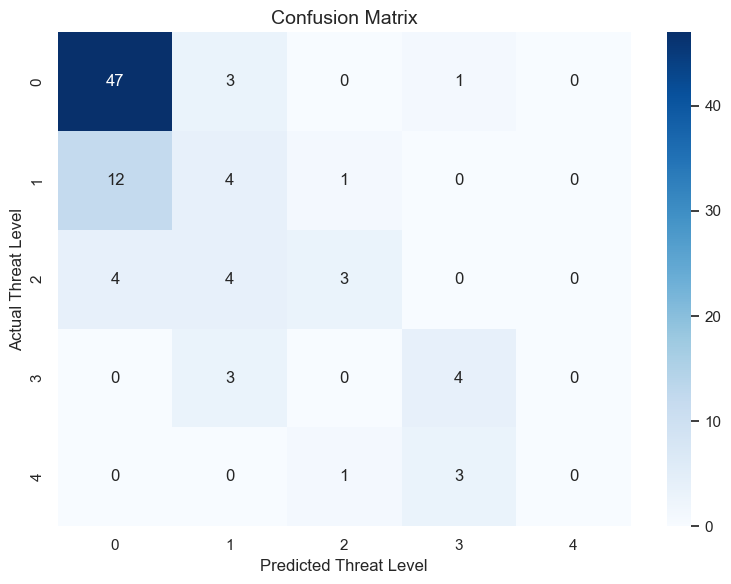

In [74]:
#Lets plot a confusion matrix for the merged_df_final
# Generate the confusion matrix
cm_final = confusion_matrix(merged_df_final['Threat Class'], merged_df_final['threat_level_model'], labels=np.unique(merged_df_final['Threat Class']))
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(merged_df_final['Threat Class']), yticklabels=np.unique(merged_df_final['Threat Class']))
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Threat Level', fontsize=12)
plt.ylabel('Actual Threat Level', fontsize=12)
plt.tight_layout()  
plt.show()